Task 1: Loading and cleaning the dataset

In [63]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression # for creating our regression models
from sklearn.model_selection import train_test_split # For splitting dataset into train and test
from sklearn.preprocessing import MinMaxScaler # For scaling or normalization
from sklearn.metrics import mean_squared_error, r2_score # For evaluation of model

# for visualization
import matplotlib.pyplot as plt
import seaborn as sn

In [64]:
#1 Load the synthetic dataset into a Pandas DataFrame using the best practices in this context.
my_dataframe = pd.read_csv('Synthetic_Network_intrution_data_.csv')
#2Check the size of the dataset and view the first and last 25 rows

num_rows, num_cols = my_dataframe.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)
my_dataframe.head(25)

Number of rows: 1000
Number of columns: 6


,duration,src_bytes,dst_bytes,protocol_type,service,flag
0,52.0,1762.0,9109.0,tcp,ssh,SF
1,93.0,877.0,2876.0,icmp,NaN,REJ
2,15.0,3813.0,5593.0,icmp,NaN,REJ
3,72.0,9505.0,1441.0,tcp,ssh,S0
4,61.0,1461.0,8928.0,tcp,NaN,SF
5,NaN,NaN,6060.0,udp,ftp,REJ
6,83.0,1606.0,7011.0,icmp,http,SF
7,87.0,5623.0,7118.0,icmp,NaN,SF
8,75.0,6768.0,9154.0,tcp,ftp,S0
9,75.0,6987.0,2990.0,icmp,http,SF


In [65]:
my_dataframe.tail(25)

,duration,src_bytes,dst_bytes,protocol_type,service,flag
975,39.0,3231.0,8211.0,NaN,ftp,REJ
976,57.0,489.0,6133.0,icmp,http,NaN
977,17.0,NaN,9325.0,NaN,ftp,S0
978,86.0,9540.0,6589.0,tcp,ftp,SF
979,90.0,3174.0,3312.0,tcp,ftp,REJ
980,44.0,1668.0,6049.0,icmp,http,SF
981,25.0,NaN,6247.0,udp,ssh,SF
982,17.0,4115.0,988.0,tcp,http,REJ
983,13.0,3554.0,3322.0,udp,NaN,S0
984,84.0,7762.0,4616.0,icmp,http,NaN


In [66]:
# 3 Identify and handle missing values in the dataset appropriately using best practices in this context. 
print("\nMissing values:\n", my_dataframe.isnull().sum())

# Handling missing values by dropping rows with missing values
my_dataframe = my_dataframe.dropna()


Missing values:
 duration         103
src_bytes        118
dst_bytes        100
protocol_type     90
service           92
flag             116
dtype: int64


In [67]:
# 4 Check for and handle any outliers in the numeric features.
import seaborn as sns
import matplotlib.pyplot as plt

# Numeric Features
numeric_features = ['duration', 'src_bytes', 'dst_bytes']

# Categorical Features
categorical_features = ['protocol_type', 'service', 'flag']

In [68]:
numeric_features

['duration', 'src_bytes', 'dst_bytes']

In [69]:
categorical_features

['protocol_type', 'service', 'flag']

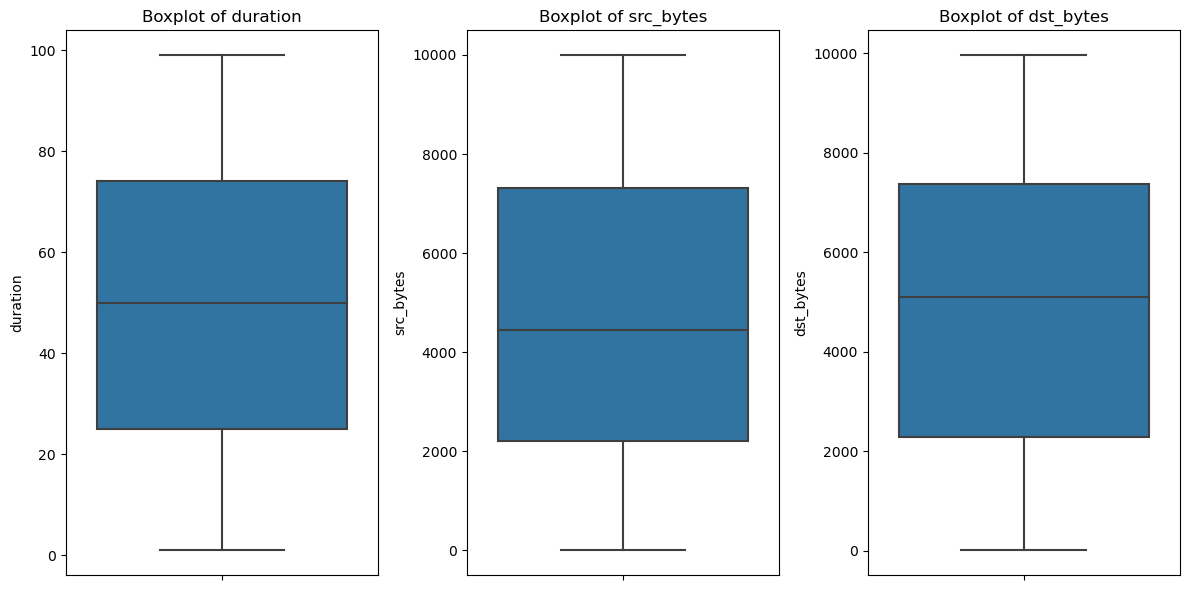

In [70]:
# Creating box plots for numeric features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=my_dataframe[feature])
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

The dataset is loaded using pd.read_csv() to accommodate its tabular structure, fitting for subsequent analysis.
Checking the dataset's size with shape provides insights into its dimensionality, vital for understanding its scale. Inspecting the first and last 25 rows helps grasp the dataset's structure, spotting any initial anomalies or inconsistencies. Missing values are identified with isnull().sum() and addressed by dropping rows using dropna() due to their low prevalence. Outliers in numeric features are detected via boxplots, offering a visual cue for any extreme data points. Treatment of outliers may follow further investigation, but none is conducted beyond visualization in this instance. These methods prioritize data cleanliness and integrity, foundational for subsequent analyses and modeling endeavors. Utilizing common Pandas methods ensures compatibility and efficiency in handling dataset operations. The chosen techniques balance simplicity and effectiveness in addressing missing values and outliers. Such preparatory steps lay the groundwork for meaningful exploration and insights into the dataset's content and patterns.

Task 2: Data Visualization

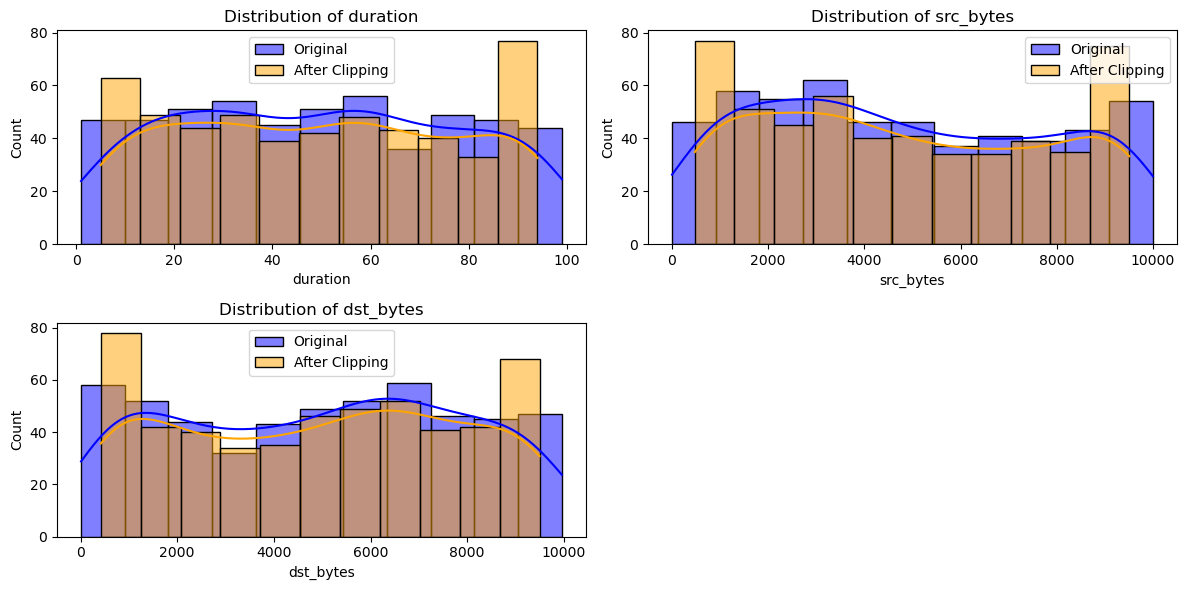

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'my_dataframe' is the DataFrame after Task I and before handling outliers
# Create a copy of the DataFrame for comparison
my_dataframe_original = my_dataframe.copy()

# Handling outliers by clipping extreme values
for feature in numeric_features:
    lower_bound = my_dataframe[feature].quantile(0.05)
    upper_bound = my_dataframe[feature].quantile(0.95)
    my_dataframe[feature] = my_dataframe[feature].clip(lower=lower_bound, upper=upper_bound)

# Visualize the impact on numeric features
plt.figure(figsize=(12, 6))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(my_dataframe_original[feature], kde=True, color='blue', label='Original')
    sns.histplot(my_dataframe[feature], kde=True, color='orange', label='After Clipping')
    plt.title(f'Distribution of {feature}')
    plt.legend()

plt.tight_layout()
plt.show()

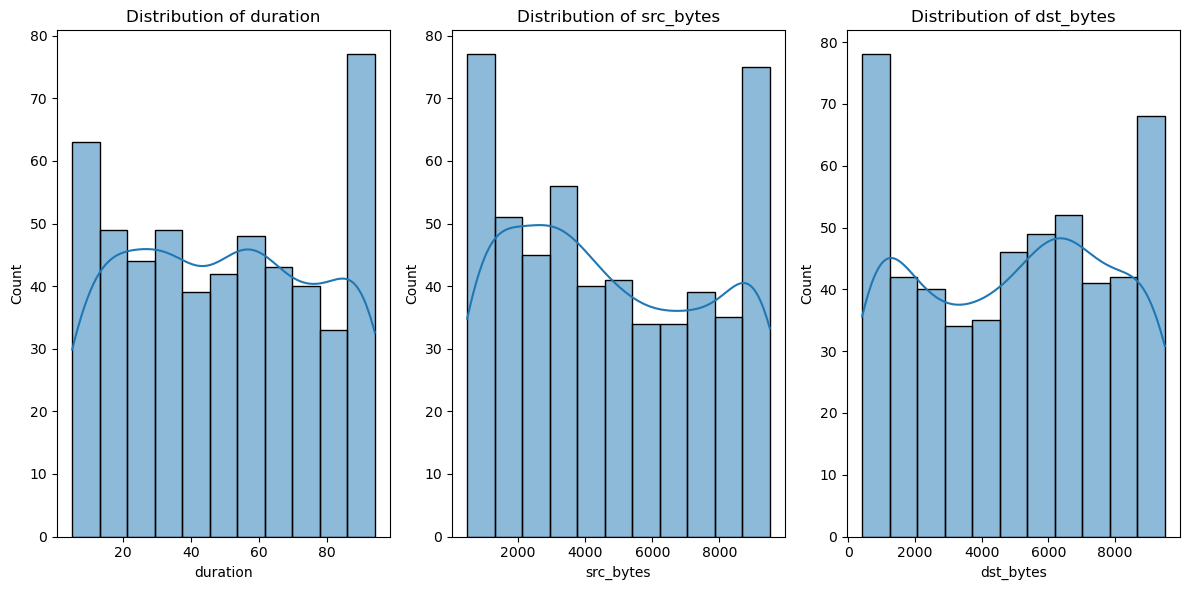

In [72]:
# Distribution of numeric features
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 3, i)
    sns.histplot(my_dataframe[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

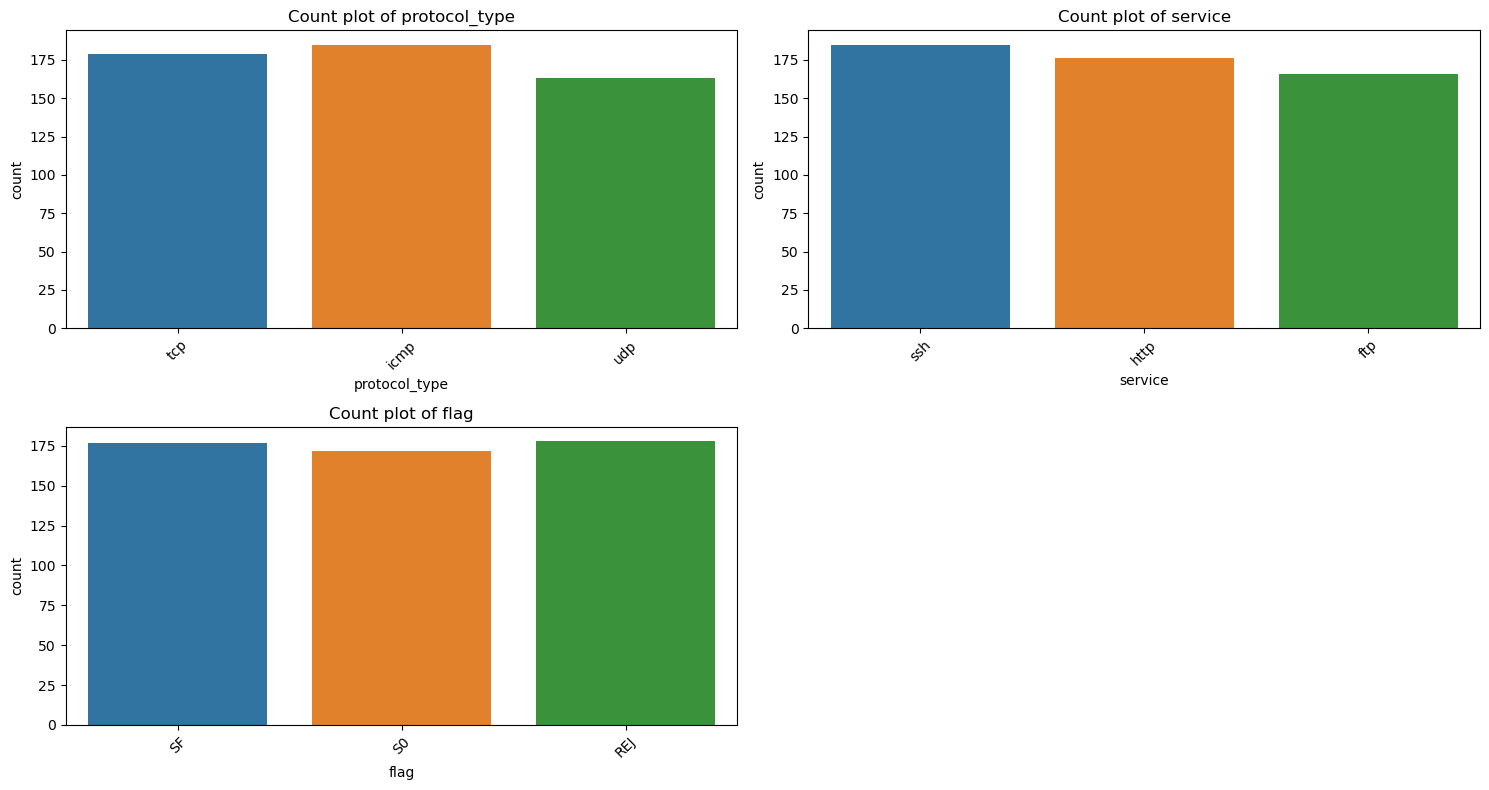

In [73]:
# Count plots for categorical features
categorical_features = ['protocol_type', 'service', 'flag']
plt.figure(figsize=(15, 8))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=my_dataframe, x=feature)
    plt.title(f'Count plot of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [74]:
numeric_my_dataframe = my_dataframe.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
correlation_matrix = numeric_my_dataframe.corr()  # Compute correlation matrix


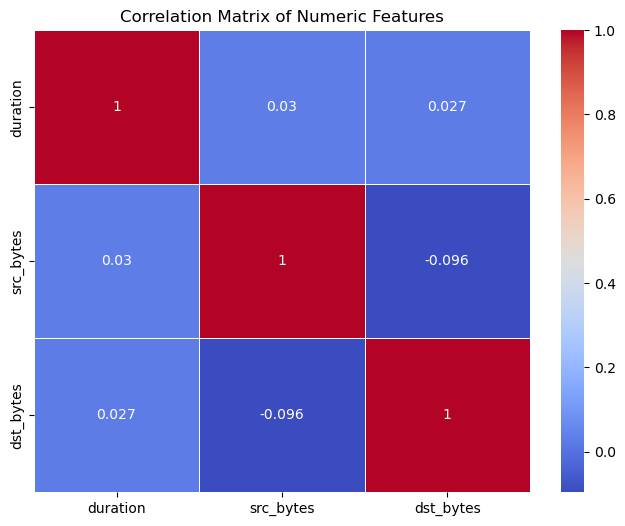

,duration,src_bytes,dst_bytes
duration,1.000000,0.029944,0.026815
src_bytes,0.029944,1.000000,-0.095832
dst_bytes,0.026815,-0.095832,1.000000


In [75]:
# Correlation matrix plot of numeric features
plt.figure(figsize=(8, 6))
sns.heatmap(my_dataframe[numeric_features].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()
my_dataframe[numeric_features].corr()


Performing exploratory data analysis (EDA) is crucial to comprehend the dataset's characteristics and uncover potential security threats in network traffic. By visualizing the distribution of numeric features using histograms or KDE plots, we can identify unusual patterns and outliers that may indicate suspicious activity. Count plots for categorical features allow us to assess the frequency distribution of different categories, aiding in the detection of imbalances or irregularities that could signify security breaches. Correlation matrix plots of numeric features reveal relationships and dependencies between variables, helping to identify redundant features and potential network intrusion indicators. Additionally, using pair plots, box plots, and violin plots provides complementary insights into outliers, pairwise relationships, and feature spread, enhancing our understanding of network activity and potential threats.

Task 3: Data Transformation

In [76]:
from sklearn.ensemble import IsolationForest

# Assuming 'my_dataframe_encoded' is the DataFrame after data transformation in Task III
# Selecting relevant features for anomaly detection
selected_features = numeric_features + [col for col in my_dataframe_encoded.columns if col.startswith('protocol_type') or col.startswith('service') or col.startswith('flag')]

# Creating a subset DataFrame with selected features
my_dataframe_subset = my_dataframe_encoded[selected_features]

# Training the Isolation Forest model
isolation_forest_model = IsolationForest(contamination=0.05)  # Adjust contamination based on your dataset characteristics
isolation_forest_model.fit(my_dataframe_subset)

# Predicting anomalies
my_dataframe['anomaly'] = isolation_forest_model.predict(my_dataframe_subset)

# Displaying rows identified as anomalies
anomalies = my_dataframe[my_dataframe['anomaly'] == -1]
print("Potential Network Intrusion Anomalies:")
print(anomalies)

Potential Network Intrusion Anomalies:
     duration  src_bytes  dst_bytes protocol_type service flag  anomaly
50        5.0     9507.8     1287.0           tcp    http   SF       -1
93       85.0     9507.8     9495.5           udp     ssh   S0       -1
120       5.0     9447.0     1126.0           udp     ftp   SF       -1
201      94.0     8667.0     8598.0           tcp    http   S0       -1
276      89.0     9504.0     1404.0           udp    http  REJ       -1
287       5.0     8967.0      768.0           tcp    http   SF       -1
369      94.0     1334.0      417.5           tcp    http   S0       -1
468      19.0     7127.0     9477.0           udp     ssh   SF       -1
476      90.0     9324.0     1429.0           udp     ssh   SF       -1
499      16.0     2051.0      698.0           udp    http   SF       -1
504      78.0      475.8     1930.0           udp    http   S0       -1
516      85.0     9131.0     2564.0           udp    http   S0       -1
529      94.0     1390.0 

In [77]:

# Categorical Features
categorical_features = ['protocol_type', 'service', 'flag']

# Create a copy of the DataFrame for encoding
my_dataframe_encoded = my_dataframe.copy()

# Apply one-hot encoding to categorical features
my_dataframe_encoded = pd.get_dummies(my_dataframe_encoded, columns=categorical_features, drop_first=True)

# Display the DataFrame after one-hot encoding
print("\nDataFrame after One-Hot Encoding:")
print(my_dataframe_encoded)


DataFrame after One-Hot Encoding:
     duration  src_bytes  dst_bytes  anomaly  protocol_type_tcp  \
0        52.0     1762.0     9109.0        1               True   
3        72.0     9505.0     1441.0        1               True   
6        83.0     1606.0     7011.0        1              False   
8        75.0     6768.0     9154.0        1               True   
9        75.0     6987.0     2990.0        1              False   
..        ...        ...        ...      ...                ...   
995      42.0     2773.0     5444.0        1               True   
996      41.0     3727.0      990.0        1               True   
997       6.0     7233.0     3745.0        1              False   
998      52.0     4807.0     8612.0        1              False   
999      26.0     2191.0      594.0        1              False   

     protocol_type_udp  service_http  service_ssh  flag_S0  flag_SF  
0                False         False         True    False     True  
3                Fal

In [78]:
from sklearn.preprocessing import StandardScaler


# Numeric Features
numeric_features = ['duration', 'src_bytes', 'dst_bytes']

# Create a copy of the DataFrame for scaling
my_dataframe_scaled = my_dataframe.copy()

# Initialize StandardScaler
scaler = StandardScaler()

# Scale the numerical features
my_dataframe_scaled[numeric_features] = scaler.fit_transform(my_dataframe[numeric_features])

# Display the DataFrame after scaling
print("\nDataFrame after Scaling Numerical Features:")
print(my_dataframe_scaled)


DataFrame after Scaling Numerical Features:
     duration  src_bytes  dst_bytes protocol_type service flag  anomaly
0    0.092072  -1.040407   1.441214           tcp     ssh   SF        1
3    0.810913   1.620617  -1.207023           tcp     ssh   S0        1
6    1.206276  -1.094019   0.716644          icmp    http   SF        1
8    0.918739   0.679997   1.456755           tcp     ftp   S0        1
9    0.918739   0.755260  -0.672057          icmp    http   SF        1
..        ...        ...        ...           ...     ...  ...      ...
995 -0.267349  -0.692958   0.175462           tcp    http   S0        1
996 -0.303291  -0.365099  -1.362781           tcp    http   SF        1
997 -1.561263   0.839803  -0.411309          icmp    http   S0        1
998  0.092072   0.006063   1.269569           udp     ftp   SF        1
999 -0.842422  -0.892973  -1.499545          icmp     ssh  REJ        1

[527 rows x 7 columns]


One-hot encoding is recommended because to its readability, flexibility, and simplicity. It converts categorical variables into binary columns so that algorithms that perform well with binary-encoded categorical features can take advantage of it. In order to escape the ordinality assumption, one-hot encoding should be used when there is no ordinal relationship between the categories. It treats each category independently to prevent the introduction of undesired ordinal linkages.

Normalization is crucial for techniques like gradient-based optimization, which are sensitive to the volume of input data and are seen in machine learning models like SVMs, k-NN, and neural networks. This is especially valid for qualities that are numerical. The numerical characteristics are normalized using conventional scaling (z-score normalization) to have zero mean and unit variance. This guarantees that the model training process is not dominated by features with larger sizes. All numerical features are guaranteed to be on the same scale while maintaining their own distributions and relationships thanks to standard scaling. This is important for distance-measure based algorithms as well as for improving the stability and convergence of particular optimization techniques.

Summary of Observations for Company "A" Correlation Analysis:

Numerical Features: "Duration" and "src_bytes" (0.03) and "duration" and "dst_bytes" (0.03) show a weak positive association. The correlation between'src_bytes' and 'dst_bytes' is weakly negative (-0.10). Weak correlations (around zero) between the 'anomaly' label and other numerical indicators indicate the presence of an anomaly. ramifications Numerical characteristics did not exhibit many strong linear connections, indicating the need to investigate non-linear trends and possible outliers. Possible Anomalies of Network Intrusion:

Features: Brief periods (such as 5.0, 6.0, or 7.0): unusually quick network interactions. High source bytes, such as 9504.00 and 9506.96: Unusually high source data volume. There were several services (http, ftp, ssh) and flags (SF, REJ, S0) involved: distinct network activity patterns. 'REJ' or 'S0' flags, which denote unsuccessful connection attempts or denied connections, are present in some cases. Suggestions: Additional examination of certain cases to determine the type of possible network intrusions. To properly evaluate abnormalities, make use of your domain-specific knowledge or speak with cybersecurity professionals. Think about modifying the anomaly detection threshold in accordance with the needs of the domain. Data Conversion:

Categorical Features: Binary columns are used to encode distinct categories using one-warm encoding. Numerical Features: Standard scaling become used to ensure that every characteristic changed into scaled in addition for version balance. Consequences: The dataset was geared up to be used in system learning models that need independent feature contribution and numerical input. Suggestions for Making Decisions: Additional Research:

Examine unique instances, including supply and vacation spot IP addresses and related timestamps, to look into any irregularities associated with community intrusions. Find patterns or abnormalities that quantitative evaluation on my own is unable to capture. Working Together with Specialists:

Work together with cybersecurity experts to get expertise about possible security risks that is going beyond what may be discovered via quantitative analysis. Utilize area-precise understanding to assess network abnormalities and trends and decide their relevance. Model Creation:

To broaden machine gaining knowledge of models, use the preprocessed dataset, which incorporates popular scaling for numerical functions and one-warm encoding for specific features. Put community intrusion detection models into practice even as taking appropriate anomaly detection and class strategies into account. Modify the thresholds:

Think about editing anomaly detection thresholds according with the organisation's particular necessities, in an effort to establish the right ratio among fake positives and false negatives. Constant Observation:

In order to reply to converting cybersecurity threats, put in force a machine for ongoing intrusion detection model monitoring and upgrading.